In [1]:
# Importation
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt

In [2]:
# Read file
data = pd.read_csv('data/tweets.csv', parse_dates=['tweet_created'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 19:35:52,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 19:15:59,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 19:15:48,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 19:15:36,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 19:14:45,NaN,Pacific Time (US & Canada)


In [3]:
# Just getting the overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null float64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null datetime64[ns]
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 1.7+ MB

In [4]:
# Dropping columns
cols = ['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline_sentiment_gold','name','negativereason_gold','tweet_coord','tweet_location']
#cols = ['tweet_id','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text','tweet_coord','tweet_location','user_timezone']
data.drop(cols, axis= 1, inplace=True)

In [9]:
# Grouping the tweets by their dates and showing the retweet counts
df = data.groupby('tweet_created')['retweet_count'].sum().reset_index()
df = df.set_index('tweet_created')
df.index

DatetimeIndex(['2015-02-17 07:36:05', '2015-02-17 07:43:02',
               '2015-02-17 07:48:48', '2015-02-17 07:52:20',
               '2015-02-17 08:00:36', '2015-02-17 08:01:07',
               '2015-02-17 08:05:27', '2015-02-17 09:18:29',
               '2015-02-17 09:30:32', '2015-02-17 09:32:09',
               ...
               '2015-02-24 19:45:20', '2015-02-24 19:46:28',
               '2015-02-24 19:47:16', '2015-02-24 19:47:50',
               '2015-02-24 19:47:53', '2015-02-24 19:48:29',
               '2015-02-24 19:48:37', '2015-02-24 19:48:38',
               '2015-02-24 19:51:48', '2015-02-24 19:53:37'],
              dtype='datetime64[ns]', name='tweet_created', length=14247, freq=None)

In [10]:
# Finding the percent growth of the columns
df['Growth'] = df.retweet_count.pct_change().mul(100).round(2)
print (df)

                     retweet_count  Growth
tweet_created                             
2015-02-17 07:36:05              0     NaN
2015-02-17 07:43:02              0     NaN
2015-02-17 07:48:48              0     NaN
2015-02-17 07:52:20              0     NaN
2015-02-17 08:00:36              0     NaN
2015-02-17 08:01:07              0     NaN
2015-02-17 08:05:27              0     NaN
2015-02-17 09:18:29              0     NaN
2015-02-17 09:30:32              0     NaN
2015-02-17 09:32:09              0     NaN
2015-02-17 09:54:53              0     NaN
2015-02-17 10:10:58              0     NaN
2015-02-17 10:23:03              0     NaN
2015-02-17 10:38:11              0     NaN
2015-02-17 11:14:32              0     NaN
2015-02-17 12:03:09              0     NaN
2015-02-17 12:33:32              0     NaN
2015-02-17 12:35:00              0     NaN
2015-02-17 12:50:05              0     NaN
2015-02-17 13:04:44              0     NaN
2015-02-17 13:07:11              0     NaN
2015-02-17 

In [11]:
# Grouping the Growth column to the same date
df = df.groupby(['tweet_created'], as_index=True)['Growth'].sum()

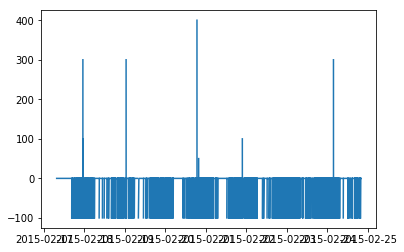

In [12]:
# Plotting the grouping
plt.plot(df)